Cleaning the Data:

In [51]:
import pandas as pd

# Loading csv file
untidy_df = pd.read_csv("data/olympics_08_medalists.csv")
print("Original (Untidy) Olympic 2008 Medalists DataFrame:")
print(untidy_df)

# Melt the DataFrame to tidy format
df_tidy_melted = pd.melt(untidy_df, 
                         id_vars=['medalist_name'], 
                         var_name='event', 
                         value_name='medal')

# Remove all rows without a medal or with NaN values, and create a copy to avoid warnings
df_tidy = df_tidy_melted.dropna().copy()

# Split the 'event' into 'gender' and 'event' using .loc to avoid the warning
df_tidy[['gender', 'event']] = df_tidy['event'].str.split('_', n=1, expand=True)

# Clean up event names
df_tidy.loc[:, 'event'] = df_tidy['event'].str.replace('-', ' ')

# Rename the 'medalist_name' column
df_tidy.rename(columns={'medalist_name': 'medalist name'}, inplace=True)

# Reorder columns for easier reading
df_tidy = df_tidy[['medalist name', 'gender', 'event', 'medal']]

print("Tidy Olympic 2008 Medalists DataFrame:")
print(df_tidy)

Original (Untidy) Olympic 2008 Medalists DataFrame:
          medalist_name male_archery female_archery male_athletics  \
0       Aaron Armstrong          NaN            NaN           gold   
1         Aaron Peirsol          NaN            NaN            NaN   
2      Abdullo Tangriev          NaN            NaN            NaN   
3     Abeer Abdelrahman          NaN            NaN            NaN   
4               Abhinav          NaN            NaN            NaN   
...                 ...          ...            ...            ...   
1870        Éver Banega          NaN            NaN            NaN   
1871  Ólafur Stefánsson          NaN            NaN            NaN   
1872      Óscar Brayson          NaN            NaN            NaN   
1873   Łukasz Pawłowski          NaN            NaN            NaN   
1874        Živko Gocić          NaN            NaN            NaN   

     female_athletics male_badminton female_badminton male_baseball  \
0                 NaN            NaN

Overview of cleaning the data: 
1. First it was necessary to load pandas because that is the essential package for tidying data in Python
2. Then I loaded the CSV file of "untidy" data that describes the medalists from the 2008 Olympic games.
3. This step is melting the data frame which is one of the ways in the Pandas Cheat sheet to gather colums into rows. This made it so there is now a medal and event column, so each observation is in its row. Instead, then every event has its column.
4. I then removed all columns that did not have a value and NA present in the data, so only the present data is there. This is done by using .dropna(). This is under the handling missing data column in the Pandas Cheat Sheet.
5. I used the .str.split command to split event and gender into their corresponding columns rather than having them combined. This made the two columns by splitting at the '_' in the events.
6. Then to remove the '_' in the medalist name column I renamed the column with the .rename function.
7. Finally, I simply reordered the columns to make more sense to the visualization.
*It is possible to method chain these steps, but I wanted to break it down to see each step work individually. 

Tidy data at its core is when the data is presented with "each variable forms its column, each observation forms its row, and each type of observational unit forms a table" ("Tidy Data", Wickham). It is a subset of data cleaning where you prepare data for analysis by removing duplicates, errors, etc. It is essentially making a data set easier for a computer to handle and process to get accurate visualizations and analysis. As Wickham puts it, tidy data allows for a "standard way of structuring a data set." Once you get it to this form, there are specifically designed tools other than analyzing and sorting through these values in a standardized way. Overall, cleaning large sets of data can be incredibly difficult, especially when you have hundreds and thousands of variables. It is even more difficult to take this data and then analyze it. By spending extra time organizing the data in a machine-readable way with tidy data, we have an easier time performing complex analysis and drawing on the data in a routine and consistent manner. 

*Both the cheat sheet and the document mentioned in the analysis are linked in the READ.me file of this project. 

Stacked Barplot: 

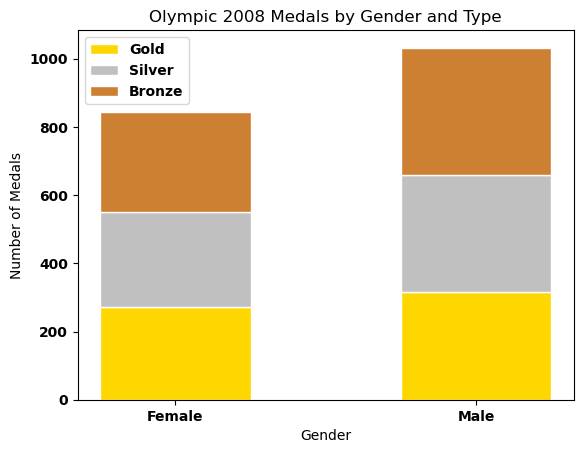

In [53]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Group data for plotting
medal_counts = df_tidy.groupby(['gender', 'medal']).size().unstack(fill_value=0)

# Values for each gender and medal type
bars_female = [medal_counts.loc['female', 'gold'], medal_counts.loc['female', 'silver'], medal_counts.loc['female', 'bronze']]
bars_male = [medal_counts.loc['male', 'gold'], medal_counts.loc['male', 'silver'], medal_counts.loc['male', 'bronze']]

# Set bold font for the y-axis
rc('font', weight='bold')

# Position of bars on x-axis
r = [0, 1]
barWidth = 0.5

# Create the stacked bar graph
plt.bar(r, [bars_female[0], bars_male[0]], color='#FFD700', edgecolor='white', width=barWidth, label='Gold')
plt.bar(r, [bars_female[1], bars_male[1]], bottom=[bars_female[0], bars_male[0]], color='#C0C0C0', edgecolor='white', width=barWidth, label='Silver')
plt.bar(r, [bars_female[2], bars_male[2]], bottom=[bars_female[0] + bars_female[1], bars_male[0] + bars_male[1]], color='#CD7F32', edgecolor='white', width=barWidth, label='Bronze')

# Custom X axis
plt.xticks(r, ['Female', 'Male'], fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Number of Medals")
plt.title("Olympic 2008 Medals by Gender and Type")
plt.legend()

# Show the graph
plt.show()

Overview of making the stacked bar graph: 
For the basis of this code, I was utilizing from Data to Viz (linked in the READ.me). Due to the multiple categorical variables present in this data set, I wanted to visualize the difference in the total number of medals between male and female participants at the 2008 Olympics. Overall, there are nearly 200 more medals given out to male participants than female participants. This is likely because there are more male events than female events in the Olympic games. Overall, this provides an interesting look at the differences in lack of equality between the two genders in terms of representation at the 2008 Olympics. 

To make this graph, 
1. All of the necessary libraries for analysis in Python are imported.
2. To use the tidy data set, I grouped just the gender and medal counts to access just that data for the graph.
3. Then I sorted the medal values to male and female, and then within that, it was sorted by gold, bronze, and silver.
4. The next two steps were formatting for the x and y axis.
5. Then I made the stacked bar graph with the help of the code from Data to Viz. This places the corresponding values on top of each other in the two gender bars with the corresponding medal color.
6. Then I added the necessary labels. 

Circular Barplot for Male Medal Counts: 

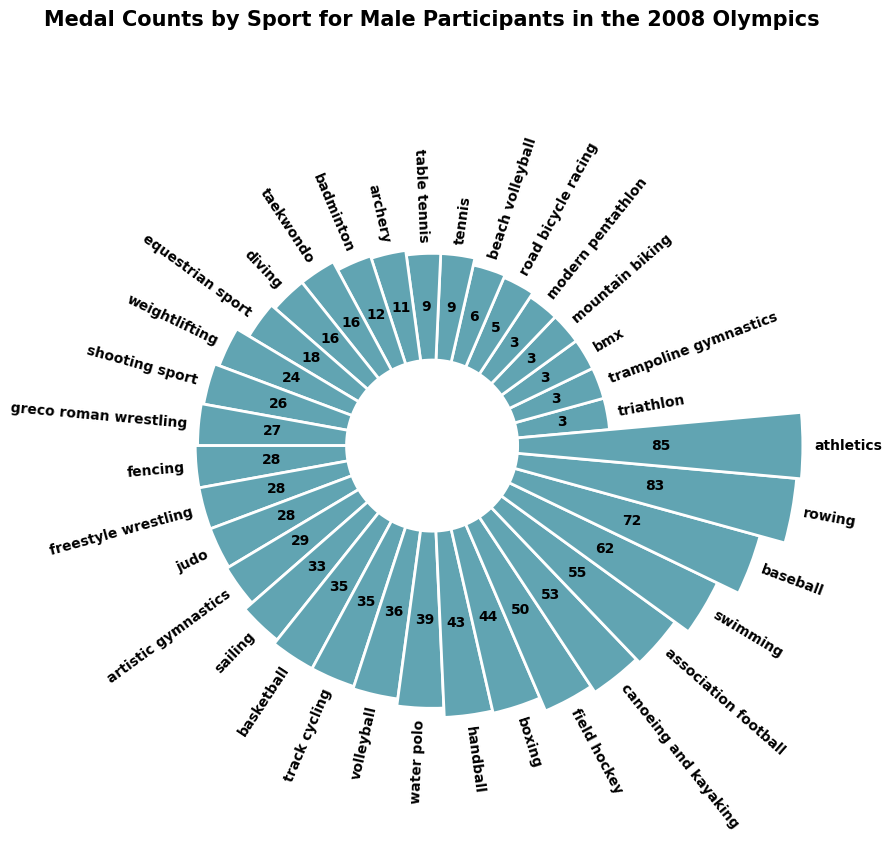

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter data for males
male_df = df_tidy[df_tidy['gender'] == 'male']

# Count medals per event
medal_counts = male_df.groupby('event').size().reset_index(name='medal_count')

# Reorder the dataframe
medal_counts = medal_counts.sort_values(by=['medal_count'])

# Initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants for plot layout
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max in the dataset
max_value = medal_counts['medal_count'].max()

# Compute heights for each bar
slope = (upperLimit - lowerLimit) / max_value
heights = slope * medal_counts['medal_count'] + lowerLimit

# Compute the width and angle of each bar
width = 2 * np.pi / len(medal_counts.index)
indexes = list(range(1, len(medal_counts.index) + 1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color="#61a4b2",
)

# Add event labels and total medal count labels
for bar, angle, height, label, count in zip(bars, angles, heights, medal_counts["event"], medal_counts["medal_count"]):
    rotation = np.rad2deg(angle)

    # Flip labels for better readability
    alignment = "left"
    if np.pi/2 <= angle < 3*np.pi/2:
        alignment = "right"
        rotation += 180

    # Add sport labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )
    
    # Add total medal counts
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() / 2,
        s=str(count),
        ha='center',
        va='center',
        color='black',
        fontweight='bold'
    )

plt.title("Medal Counts by Sport for Male Participants in the 2008 Olympics", size=15, weight='bold')
plt.show()

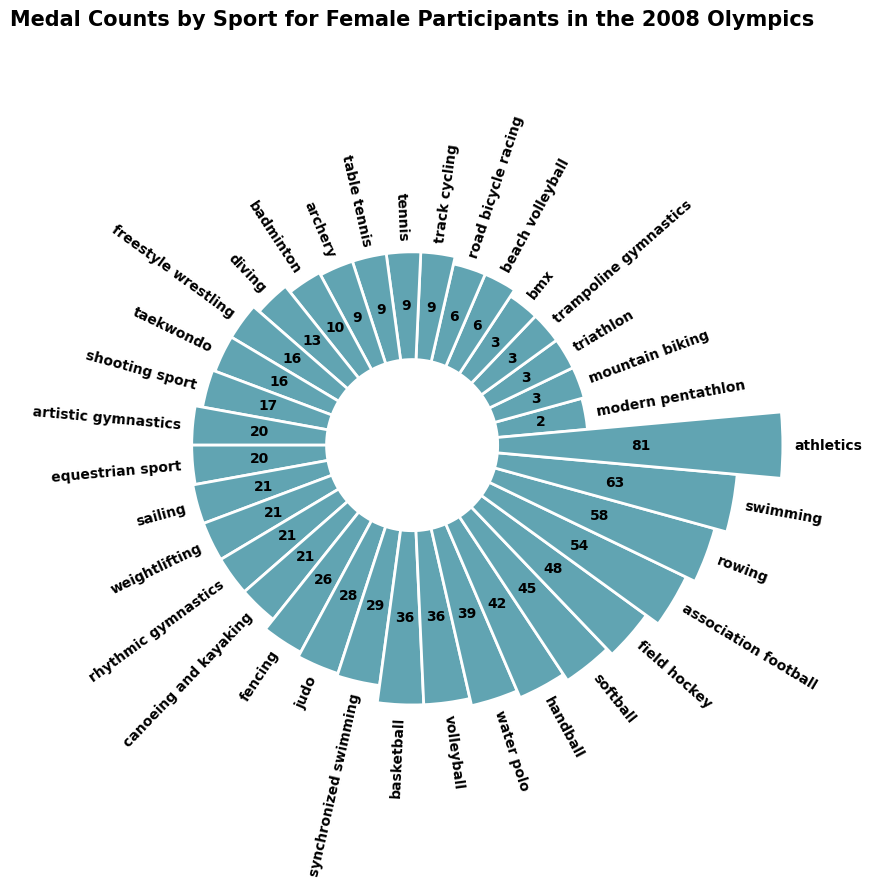

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter data for females
female_df = df_tidy[df_tidy['gender'] == 'female']

# Count medals for each event
medal_counts = female_df.groupby('event').size().reset_index(name='medal_count')

# Reorder the dataframe
medal_counts = medal_counts.sort_values(by=['medal_count'])

# Initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants for plot layout
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max in the dataset
max_value = medal_counts['medal_count'].max()

# Compute heights for each bar
slope = (upperLimit - lowerLimit) / max_value
heights = slope * medal_counts['medal_count'] + lowerLimit

# Compute the width and angle of each bar
width = 2 * np.pi / len(medal_counts.index)
indexes = list(range(1, len(medal_counts.index) + 1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color="#61a4b2",
)

# Add events labels and total medal count labels
for bar, angle, height, label, count in zip(bars, angles, heights, medal_counts["event"], medal_counts["medal_count"]):
    rotation = np.rad2deg(angle)

    # Flip labels for better readability
    alignment = "left"
    if np.pi/2 <= angle < 3*np.pi/2:
        alignment = "right"
        rotation += 180

    # Add sport labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )
    
    # Add total medal counts
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() / 2,
        s=str(count),
        ha='center',
        va='center',
        color='black',
        fontweight='bold'
    )

plt.title("Medal Counts by Sport for Female Participants in the 2008 Olympics", size=15, weight='bold')
plt.show()

Overview of making the circular bar plots: 
When I was looking at ways to compare categorical data on Data to Viz, I thought that a circular barplot was a unique way to present data. I wanted to look at the differences in medal counts in events in both males and females. I thought that individually each barplot is interesting, but they are also intriguing next to each other. I purposely did not combine them to not overwhelm the reader, and to allow for interpretation of just male and female sports individually or them against against each other. 

It demonstrates what sports are more prevalent or even not offered depending on your gender. For example, baseball has the 3rd highest medal count in male athletes, but swimming is 2nd highest for females (not swimming nearly gives out the same medal amounts in male and female athletes). It is also important to note that this is the number of medals given out to each person on a team, so individual sports vs team sports do play a role. 

As a graph, I feel like these circular bar graphs provide a really exciting way to draw you into reading and exploring the data. It makes it more interesting than just a typical bar graph.  

To make these graphs, I started with the baseline from Data to Viz and then I applied it to the Tidy data set:
1. The necessary libraries are inserted
2. I filtered the tidy data frame for just the specific gender
3. I then counted the number of medals in each event for each of the genders, so I could have quantified data for the graph.
4. Then I followed the Data to Viz code by sorting the values by the max of medal counts.
5. The next step is to initialize the figure and add constants to control the plot layout.
6. Then you compute the max in the dataset
7. Part of this graph compares the height by converting the value into the corresponding height of the bar.
8. Then you use standard code to compute the width and angle that these bars are centered on to make the circle.
9. Then I used their code to draw the bars on the graph.
10. I added labels for each event and the total medal count which are angled and flipped to ensure readability.

Overall, a lot of this code was edited from the Data to Viz basis, except for the sorting data at the start. From there, I copied the code twice to make the male and female specific graphs. 

Pivot table sorting sport by the highest total amount of medals awarded in both genders: 

In [29]:
pivot_sport_total = pd.pivot_table(df_tidy, 
                                   index='event', 
                                   values='medal', 
                                   aggfunc='count', 
                                   fill_value=0).sort_values(by='medal', ascending=False)
print(pivot_sport_total)

                       medal
event                       
athletics                166
rowing                   141
swimming                 125
association football     109
field hockey              98
handball                  85
water polo                78
canoeing and kayaking     74
baseball                  72
volleyball                72
basketball                71
judo                      56
sailing                   54
fencing                   54
artistic gymnastics       49
softball                  45
weightlifting             45
freestyle wrestling       44
track cycling             44
boxing                    44
shooting sport            43
equestrian sport          38
taekwondo                 32
synchronized swimming     29
diving                    29
greco roman wrestling     27
badminton                 22
rhythmic gymnastics       21
archery                   20
table tennis              18
tennis                    18
beach volleyball          12
road bicycle r

Overview of pivot table sorting highest events in overall medal count: 
The point of a pivot table is to organize data quickly. It will highlight basic counts, averages, etc. quickly and easily when dealing with large data sets. In this code, I use the pd.pivot_table() function to make the table. Then the index aspect specifies what each row in the table will identify. The values portion counts the medals in each of the events. Aggfunc ensures that it is acquiring a count of those values. Fill_value puts a 0 if an event doesn't have data. Then sort_values in the ascending= false order makes it so the medal count will be organized by highest at the top and lowest at the bottom. 

This is a similar way to look at what the circular bar plots analyzed. Here, you can tell that baseball, which was high for male athletes, is not high overall because there are no female participants. It highlights where both genders see many medalists, such as in athletics and rowing. Here, I am taking the categorical values and putting them into a numerical analysis. 

Pivot table highlighting the number of each type of medal given out in each sport across all genders:

In [45]:
pivot_sport_medal = pd.pivot_table(df_tidy, 
                                   index='event', 
                                   columns='medal', 
                                   aggfunc='size', 
                                   fill_value=0)
print(pivot_sport_medal)

medal                  bronze  gold  silver
event                                      
archery                     8     5       7
artistic gymnastics        19    14      16
association football       36    37      36
athletics                  55    52      59
badminton                   7     7       8
baseball                   24    24      24
basketball                 24    23      24
beach volleyball            4     4       4
bmx                         2     2       2
boxing                     22    11      11
canoeing and kayaking      27    24      23
diving                     11     7      11
equestrian sport           14    11      13
fencing                    15    18      21
field hockey               33    33      32
freestyle wrestling        22    11      11
greco roman wrestling      13     7       7
handball                   28    29      28
judo                       28    14      14
modern pentathlon           1     2       2
mountain biking             2   

Overview of highlighting the breakdown of types of medals across all sports and genders: 
This is another pivot table which was described above. To make this table I used the same outline with the index still equalling event, but the columns aspect adds columns with the types of medals (gold, bronze, silver). The size aggfunc will countthe number of rows in the tidy data set that has the combo of the event and the medal. This provides the values in the pivot table. 
Here you can now see the breakdown across the types of medals in each sport. I find it interesting how some sports don't have equal values across the three medals. I would assume that if a gold was given then a silver and bronze would also be given. However, htis is not the case for many events like archery, basketball, road bicycle racing, swimming, etc. I would be intrigued to dig deeper into why the data is that way. 